# Import packages

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import datetime

# Import data and create datetime index

In [14]:
df = pd.read_csv('australian_temp.csv')
df = df.set_index(
    pd.to_datetime(
        df.Date.rename(columns = {'Date':''}),
        format = '%d/%m/%y'), 
    drop = False)

# Calculate the trend line

In [15]:
# Calculate monthly average
df_monthly_average = df.groupby(['Month', 'Year'], as_index = False)['Temp'].mean()
df_monthly_average.sort_values(['Year', 'Month'], inplace = True)
df_monthly_average['Date'] = df_monthly_average['Year'].astype(str) \
    + '-' + df_monthly_average['Month'].astype(str) + '-15'
df_monthly_average.set_index(pd.to_datetime(df_monthly_average['Date'], format = '%Y-%m-%d'), inplace = True)

# Interpolate back onto a daily frequency using quadratic inperpolation
df_trend = pd.DataFrame(
    data = df_monthly_average['Temp'].resample('d').interpolate(method='quadratic')
).rename(columns = {'Temp': 'Trend'})

# Add the trend to the original dataframe
df = pd.merge(
    df,
    df_trend,
    how = 'left',
    left_index = True,
    right_index = True
)

In [16]:
# Set the font to a serif font
rc('font', family='serif')

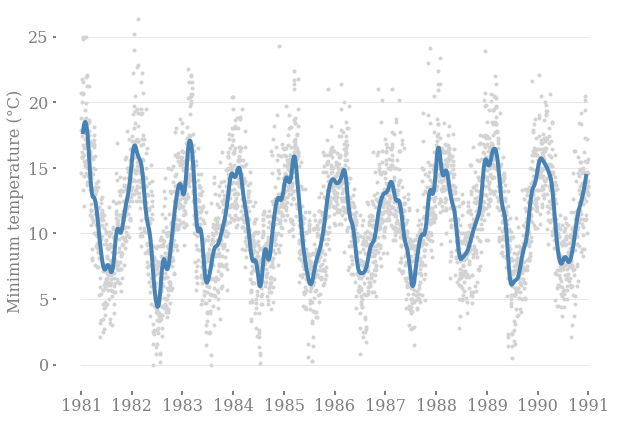

In [17]:
fig, ax = plt.subplots(figsize = (10,7))

# Add the horizontal lines at a spacing of 5 degrees
timespan = [df.index[0], df.index[-1]]
for yLoc in range(0, 26, 5):
    plt.plot(timespan, [yLoc, yLoc], linewidth = 1, color = 'lightgrey', alpha = 0.5)

# Plot the daily temperatures as grey dots
plt.plot(
    df.index,
    df['Temp'],
    '.',
    color = 'lightgrey'
)

# Add the interpolant
plt.plot(
    df.index,
    df['Trend'],
    '-',
    color = 'steelblue',
    linewidth = 4
)

# Set xticks
xTickVals = pd.date_range(start=timespan[0], end=timespan[-1]+datetime.timedelta(1), freq='YS')
plt.xticks(xTickVals)

# Set y label
plt.ylabel('Minimum temperature (°C)', color = 'grey', fontsize = 16)


# Remove the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis tick widths to 2
ax.tick_params(axis='x', colors='grey', width = 2)
ax.tick_params(axis='y', colors='grey', width = 2)

# Change font size
plt.yticks(fontsize = 16, color = 'grey')
plt.xticks(fontsize = 16, color = 'grey')

plt.ylim(-2, 27)

plt.show()